In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch


from algorithms.gam import gam
from algorithms.lv_hba import lv_hba
from algorithms.blooc import blooc
from algorithms.salvf_cvxpy import salvf

from utils import *

In [13]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.sans-serif']=['Arial']
plt.rcParams['axes.unicode_minus']=False

In [14]:
epochs = 60
seeds = 10

In [15]:
hparams = {
    'lv_hba': {
        'alpha': 0.01,
        'gama1': 0.1,
        'gama2': 0.1,
        'yita': 0.001
    },
    'gam': {
        'alpha': 0.05,
        'epsilon': 0.005
    },
    'blooc': {
        'gam': 12.,
        'eta': 0.01,
        'T': 20,
        'Ty': 20,
        'eta1g': 0.001,
        'eta1F': 0.00001,
        'eta2g': 0.0001,
        'eta2F': 0.0001
    },
    'salvf': {
        'c1': 5.,
        'c2': 0.1,
        'alpha':0.001
    }
}

# Dataset fourclass

In [16]:
dataset_name = "fourclass"
data = load_fourclass()

n_train = 500
n_val = 150

metrics_fourclass = {}
variables_fourclass = {}

algs = ['salvf','blooc', 'lv_hba', 'gam']
# algs = ['salvf']

for a in algs:
    metrics_fourclass[a] = []
    variables_fourclass[a] = []

In [17]:
for seed in range(seeds):

    print(f"Starting seed {seed+1}/{seeds}: ", end="")

    x_train, y_train, x_val, y_val, x_test, y_test = train_val_test_split(data, seed, n_train, n_val)

    for alg in algs:
        print(f"{alg}", end=" ")

        metrics_seed, variables_seed = eval(alg)(x_train, y_train, x_val, y_val, x_test, y_test, hparams[alg], epochs, verbose=True)
        metrics_fourclass[alg].append(metrics_seed)
        variables_fourclass[alg].append(variables_seed)
    print("DONE")

Starting seed 1/10: salvf 

Epoch [0/60]: val acc: 0.55 val loss: 3.05 test acc: 0.58 test loss: 2.98
Epoch [20/60]: val acc: 0.61 val loss: 2.68 test acc: 0.57 test loss: 2.80
Epoch [40/60]: val acc: 0.61 val loss: 2.68 test acc: 0.57 test loss: 2.80
blooc Epoch [0/60]: val acc: 0.39 val loss: 4.88 test acc: 0.43 test loss: 4.65
Epoch [20/60]: val acc: 0.61 val loss: 2.70 test acc: 0.57 test loss: 2.71
Epoch [40/60]: val acc: 0.61 val loss: 2.71 test acc: 0.57 test loss: 2.71
lv_hba val acc: 0.55 val loss: 3.05 test acc: 0.58 test loss: 2.98 round: 0
val acc: 0.73 val loss: 2.42 test acc: 0.74 test loss: 2.42 round: 20
val acc: 0.73 val loss: 2.38 test acc: 0.76 test loss: 2.39 round: 40
gam val acc: 0.55 val loss: 3.05 test acc: 0.58 test loss: 2.98 round: 0
val acc: 0.61 val loss: 2.48 test acc: 0.57 test loss: 2.54 round: 20
val acc: 0.67 val loss: 2.45 test acc: 0.62 test loss: 2.50 round: 40
DONE
Starting seed 2/10: salvf Epoch [0/60]: val acc: 0.57 val loss: 3.30 test acc: 0.55 test loss: 2.92
Epoch [20/60

## Evaluation

In [36]:
results_path = "figs"

#f'../results/hyperparam_opt/{dataset_name}/'


In [37]:
metrics_lvhba = metrics_fourclass['lv_hba']
metrics_gam = metrics_fourclass['gam']
metrics_blooc = metrics_fourclass['blooc']
metrics_salvf = metrics_fourclass['salvf']

axis_iter = np.arange(epochs)

In [38]:
# Metrics for lvhba
if "lv_hba" in algs:
    axis_lvhba = np.array([[x['time_computation'] for x in metric] for metric in metrics_lvhba]).mean(0)
    train_acc_lvhba = np.array([[x['train_acc'] for x in metric] for metric in metrics_lvhba])
    val_acc_lvhba = np.array([[x['val_acc'] for x in metric] for metric in metrics_lvhba])
    test_acc_lvhba = np.array([[x['test_acc'] for x in metric] for metric in metrics_lvhba])

    val_loss_lvhba = np.array([[x['val_loss'] for x in metric] for metric in metrics_lvhba])[:, 0:]
    test_loss_lvhba = np.array([[x['test_loss'] for x in metric] for metric in metrics_lvhba])[:, 0:]
    lower_loss_lvhba = np.array([[x['loss_lower'] for x in metric] for metric in metrics_lvhba])[:, 1:]
    # constraint_violation_lvhba = np.array([[x['constraint_violation'] for x in metric] for metric in metrics_lvhba])[:, 1:]

# Metrics for gam
if "gam" in algs:
    axis_gam = np.array([[x['time_computation'] for x in metric] for metric in metrics_gam]).mean(0)
    train_acc_gam = np.array([[x['train_acc'] for x in metric] for metric in metrics_gam])
    val_acc_gam = np.array([[x['val_acc'] for x in metric] for metric in metrics_gam])
    test_acc_gam = np.array([[x['test_acc'] for x in metric] for metric in metrics_gam])
    val_loss_gam = np.array([[x['val_loss'] for x in metric] for metric in metrics_gam])[:, 0:]
    test_loss_gam = np.array([[x['test_loss'] for x in metric] for metric in metrics_gam])[:, 0:]
    lower_loss_gam = np.array([[x['loss_lower'] for x in metric] for metric in metrics_gam])[:, 1:]

# Metrics for blooc
if "blooc" in algs:
    axis_blooc = np.array([[x['time_computation'] for x in metric] for metric in metrics_blooc]).mean(0)
    train_acc_blooc = np.array([[x['train_acc_F'] for x in metric] for metric in metrics_blooc])
    val_acc_blooc = np.array([[x['val_acc_F'] for x in metric] for metric in metrics_blooc])
    test_acc_blooc = np.array([[x['test_acc_F'] for x in metric] for metric in metrics_blooc])
    val_loss_blooc = np.array([[x['val_loss_F'] for x in metric] for metric in metrics_blooc])[:, 0:]
    test_loss_blooc = np.array([[x['test_loss_F'] for x in metric] for metric in metrics_blooc])[:, 0:]
    lower_loss_blooc = np.array([[x['loss_lower'] for x in metric] for metric in metrics_blooc])[:, 1:]

# Metrics for salvf
if "salvf" in algs:
    axis_salvf = np.array([[x['time_computation'] for x in metric] for metric in metrics_salvf]).mean(0)
    train_acc_salvf = np.array([[x['train_acc_F'] for x in metric] for metric in metrics_blooc])  # Potential typo in source
    val_acc_salvf = np.array([[x['val_acc_F'] for x in metric] for metric in metrics_salvf])
    test_acc_salvf = np.array([[x['test_acc_F'] for x in metric] for metric in metrics_salvf])
    val_loss_salvf = np.array([[x['val_loss'] for x in metric] for metric in metrics_salvf])[:, 0:]
    test_loss_salvf = np.array([[x['test_loss'] for x in metric] for metric in metrics_salvf])[:, 0:]
    lower_loss_salvf = np.array([[x['loss_lower'] for x in metric] for metric in metrics_salvf])[:, 1:]
    # constraint_violation_salvf = np.array([[x['constraint_violation'] for x in metric] for metric in metrics_salvf])[:, 1:]

In [39]:
if len(algs) == 4:
    metrics_combined = {
        "lvhba": {
            "val_loss": val_loss_lvhba.tolist(),
            "test_loss": test_loss_lvhba.tolist(),
            "lower_loss": lower_loss_lvhba.tolist(),
            "train_acc": train_acc_lvhba.tolist(),
            "val_acc": val_acc_lvhba.tolist(),
            "test_acc": test_acc_lvhba.tolist(),
            "axis":axis_lvhba.tolist(),
        },
        "gam": {
            "val_loss": val_loss_gam.tolist(),
            "test_loss": test_loss_gam.tolist(),
            "lower_loss": lower_loss_gam.tolist(),
            "train_acc": train_acc_gam.tolist(),
            "val_acc": val_acc_gam.tolist(),
            "test_acc": test_acc_gam.tolist(),
            "axis":axis_gam.tolist(),
        },
        "blooc": {
            "val_loss": val_loss_blooc.tolist(),
            "test_loss": test_loss_blooc.tolist(),
            "lower_loss": lower_loss_blooc.tolist(),
            "train_acc": train_acc_blooc.tolist(),
            "val_acc": val_acc_blooc.tolist(),
            "test_acc": test_acc_blooc.tolist(),
            "axis":axis_blooc.tolist(),
        },
        "salvf": {
            "val_loss": val_loss_salvf.tolist(),
            "test_loss": test_loss_salvf.tolist(),
            "lower_loss": lower_loss_salvf.tolist(),
            "train_acc": train_acc_salvf.tolist(),
            "val_acc": val_acc_salvf.tolist(),
            "test_acc": test_acc_salvf.tolist(),
            "axis": axis_salvf.tolist(),
        },
    }



    # Flatten the data for CSV
    flat_data = []
    for method, metrics in metrics_combined.items():
        for metric_name, values in metrics.items():
            for i, row in enumerate(values):
                flat_data.append({"method": method, "metric": metric_name, "index": i, "values": row})

    # Convert to DataFrame and save as CSV
    df = pd.DataFrame(flat_data)
    df.to_csv("metrics_results_combined_fourclass.csv", index=False)
    print("Metrics saved to 'metrics_results_combined_fourclass.csv'")

Metrics saved to 'metrics_results_combined_fourclass.csv'


In [40]:


# Load the CSV file
df = pd.read_csv("metrics_results_combined_fourclass.csv")

# Convert the string representation of lists back to Python lists
df["values"] = df["values"].apply(eval)

# Initialize a dictionary for reconstructed variables
reconstructed_variables = {}

# Group by method and metric, and dynamically create variables
for (method, metric), group in df.groupby(["method", "metric"]):
    # Create variable name dynamically, e.g., "train_acc_lvhba"
    if method not in algs:
        variable_name = f"{metric}_{method}"
        # Sort by index to preserve order and convert to list
        reconstructed_variables[variable_name] = group.sort_values("index")["values"].tolist()
        reconstructed_variables[variable_name] = np.array(reconstructed_variables[variable_name])

# Dynamically assign each variable to the global namespace (optional)
globals().update(reconstructed_variables)


(0.0, 6.0)

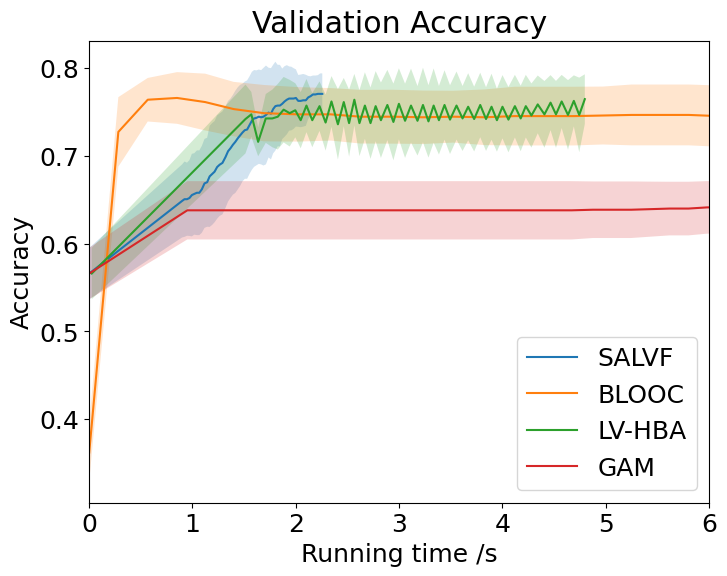

In [41]:
plt.figure(figsize=(8,6))

plt.plot(axis_salvf,val_acc_salvf.mean(0),'-',label="SALVF")
plt.fill_between(axis_salvf,val_acc_salvf.mean(0)-val_acc_salvf.std(0),val_acc_salvf.mean(0)+val_acc_salvf.std(0),alpha=0.2)

plt.plot(axis_blooc,val_acc_blooc.mean(0),'-',label="BLOOC")
plt.fill_between(axis_blooc,val_acc_blooc.mean(0)-val_acc_blooc.std(0),val_acc_blooc.mean(0)+val_acc_blooc.std(0),alpha=0.2)

plt.plot(axis_lvhba,val_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,val_acc_lvhba.mean(0)-val_acc_lvhba.std(0),val_acc_lvhba.mean(0)+val_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_gam,val_acc_gam.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,val_acc_gam.mean(0)-val_acc_gam.std(0),val_acc_gam.mean(0)+val_acc_gam.std(0),alpha=0.2)


plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")
plt.xlim([0, 6])
# plt.savefig(results_path + 'val_accuracy_running_time.pdf', bbox_inches="tight")

Text(0, 0.5, 'Accuracy')

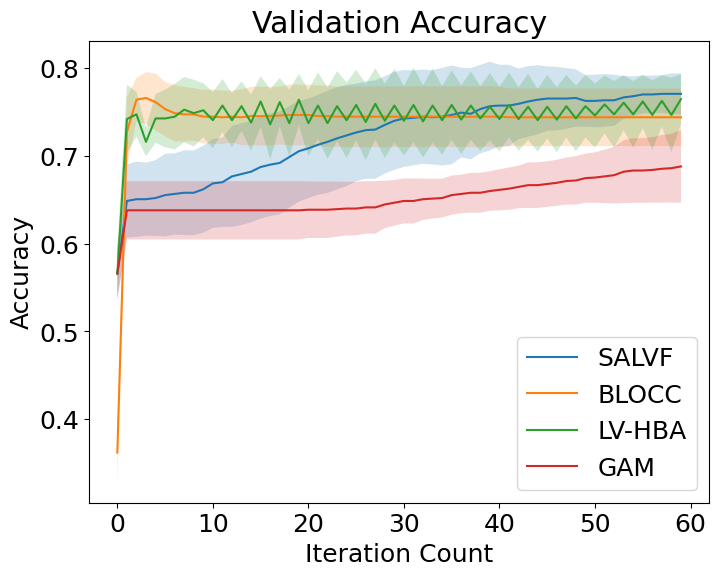

In [42]:
plt.figure(figsize=(8,6))

iter_axis = np.arange(val_acc_gam.shape[1])

plt.plot(axis_iter,val_acc_salvf.mean(0),'-',label="SALVF")
plt.fill_between(axis_iter,val_acc_salvf.mean(0)-val_acc_salvf.std(0),val_acc_salvf.mean(0)+val_acc_salvf.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_blooc.mean(0),'-',label="BLOCC")
plt.fill_between(axis_iter,val_acc_blooc.mean(0)-val_acc_blooc.std(0),val_acc_blooc.mean(0)+val_acc_blooc.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_iter,val_acc_lvhba.mean(0)-val_acc_lvhba.std(0),val_acc_lvhba.mean(0)+val_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_gam.mean(0),'-',label="GAM")
plt.fill_between(axis_iter,val_acc_gam.mean(0)-val_acc_gam.std(0),val_acc_gam.mean(0)+val_acc_gam.std(0),alpha=0.2)

plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Iteration Count')
plt.ylabel("Accuracy")


# plt.savefig(results_path + 'val_accuracy_iteration.pdf', bbox_inches="tight")

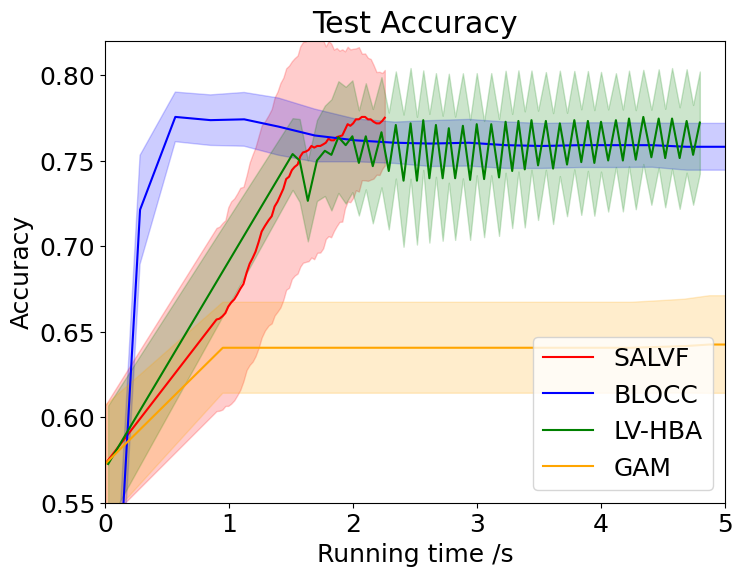

In [45]:
plt.figure(figsize=(8,6))

plt.plot(axis_salvf,test_acc_salvf.mean(0),'-',label="SALVF", color='red')
plt.fill_between(axis_salvf,test_acc_salvf.mean(0)-test_acc_salvf.std(0),test_acc_salvf.mean(0)+test_acc_salvf.std(0),alpha=0.2, color='red')

plt.plot(axis_blooc,test_acc_blooc.mean(0),'-',label="BLOCC", color='blue')
plt.fill_between(axis_blooc,test_acc_blooc.mean(0)-test_acc_blooc.std(0),test_acc_blooc.mean(0)+test_acc_blooc.std(0),alpha=0.2, color='blue')

plt.plot(axis_lvhba,test_acc_lvhba.mean(0),'-',label="LV-HBA", color='green')
plt.fill_between(axis_lvhba,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2, color='green')

plt.plot(axis_gam,test_acc_gam.mean(0),'-',label="GAM", color='orange')
plt.fill_between(axis_gam,test_acc_gam.mean(0)-test_acc_gam.std(0),test_acc_gam.mean(0)+test_acc_gam.std(0),alpha=0.2, color='orange')

plt.legend(loc='lower right')
plt.title('Test Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")

plt.xlim([0, 5])
plt.ylim([0.55, 0.82])

plt.savefig(results_path + '/SVM_test_acc_vs_time_fourclass.pdf', bbox_inches="tight")

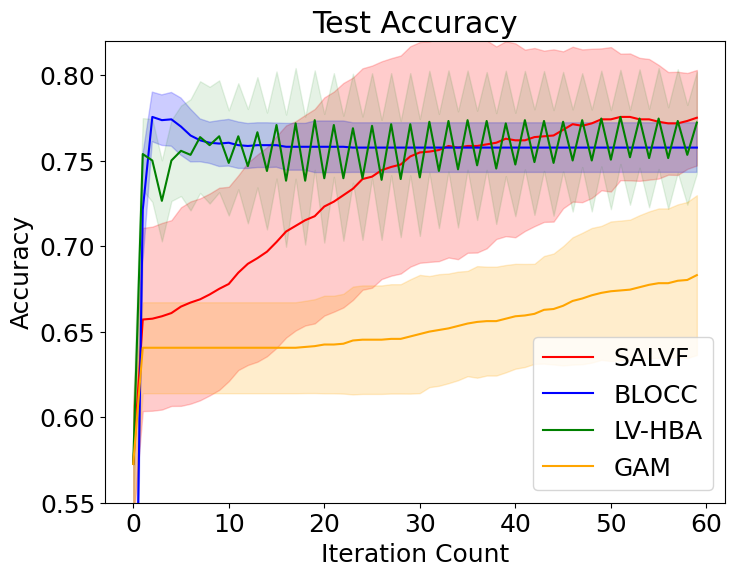

In [46]:
plt.figure(figsize=(8,6))

plt.plot(axis_iter,test_acc_salvf.mean(0),'-',label="SALVF", color='red')
plt.fill_between(axis_iter,test_acc_salvf.mean(0)-test_acc_salvf.std(0),test_acc_salvf.mean(0)+test_acc_salvf.std(0),alpha=0.2, color='red')

plt.plot(axis_iter,test_acc_blooc.mean(0),'-',label="BLOCC", color='blue')
plt.fill_between(axis_iter,test_acc_blooc.mean(0)-test_acc_blooc.std(0),test_acc_blooc.mean(0)+test_acc_blooc.std(0),alpha=0.2, color='blue')

plt.plot(axis_iter,test_acc_lvhba.mean(0),'-',label="LV-HBA", color='green')
plt.fill_between(axis_iter,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.1, color='green')

plt.plot(axis_iter,test_acc_gam.mean(0),'-',label="GAM", color='orange')
plt.fill_between(axis_iter,test_acc_gam.mean(0)-test_acc_gam.std(0),test_acc_gam.mean(0)+test_acc_gam.std(0),alpha=0.2, color='orange')

plt.legend()
plt.ylim([0.55, 0.82])
plt.title('Test Accuracy')
plt.xlabel('Iteration Count')
plt.ylabel("Accuracy")
plt.savefig(results_path + '/SVM_test_acc_vs_iter_fourclass.pdf', bbox_inches="tight")